![](../Assets/itd.png)
<div style= "Text-align: center">
    
# Analisis de Datos 
## Contador SQLite de Internet
### José Gabriel Rodriguez Rivas    
### Angel Omar Ceniceros Berumen
    
    

</div>

### Paso 1 Conectarse a la Base de Datos

In [1]:
# Code Cell 5
# this is the library to talk to the database
import sqlite3
import pandas as pd
# this is a library for data vizualization
from matplotlib import pyplot as plt
# this is to say that we want our plots to be part of this page, and not opened in a new window
%matplotlib inline


In [2]:
conn = sqlite3.connect('./Data/InternetSpeed.db')

In [3]:
# Code Cell 6
# what is the name of the database you want to connect to?
# conn = sqlite3.connect(??)

cur = conn.cursor()

In [12]:
query = 'SELECT DateTime FROM LA_wifi_speed_UK ORDER BY DateTime LIMIT 10'
cur.execute(query)

In [13]:
# Code Cell 8
for row in cur:
    print (row)


('2016-11-23 00:00:00.000000',)
('2016-11-23 00:30:00.000000',)
('2016-11-23 01:00:00.000000',)
('2016-11-23 01:30:00.000000',)
('2016-11-23 02:00:00.000000',)
('2016-11-23 02:30:00.000000',)
('2016-11-23 03:00:00.000000',)
('2016-11-23 03:30:00.000000',)
('2016-11-23 04:00:00.000000',)
('2016-11-23 04:30:00.000000',)


In [11]:
# Code Cell 9
query = 'SELECT DateTime FROM LA_wifi_speed_UK ORDER BY RANDOM() LIMIT 10'
cur.execute(query)

for row in cur:
    print (row)

('2016-12-05 01:00:00.000000',)
('2016-12-12 19:00:00.000000',)
('2016-12-07 18:00:00.000000',)
('2016-12-12 15:00:00.000000',)
('2016-11-27 14:00:00.000000',)
('2016-12-08 05:00:00.000000',)
('2016-11-28 08:00:00.000000',)
('2016-12-04 16:00:00.000000',)
('2016-11-28 18:30:00.000000',)
('2016-11-24 13:00:00.000000',)


#### Paso 2: Nombres de las 900 columnas

In [14]:
# Code Cell 10
# we need to have a cursor pointing to a table for this operation
query = 'SELECT * FROM LA_wifi_speed_UK LIMIT 1'
cur.execute(query)

In [16]:
# Code Cell 11
#visualizing the first 10 rows of the field description
#Como el resultado de cur.execute retorna 900 columnas o datos
#Limitamos la descripcion a solo 10 datos
cur.description[:10]

(('E07000223_p', None, None, None, None, None, None),
 ('E07000026_p', None, None, None, None, None, None),
 ('E07000032_p', None, None, None, None, None, None),
 ('E07000224_p', None, None, None, None, None, None),
 ('E07000170_p', None, None, None, None, None, None),
 ('E07000105_p', None, None, None, None, None, None),
 ('E07000004_p', None, None, None, None, None, None),
 ('E07000200_p', None, None, None, None, None, None),
 ('E09000002_p', None, None, None, None, None, None),
 ('E09000003_p', None, None, None, None, None, None))

In [23]:
# Code Cell 12
# loop over the header and store them in a list
columns = [member[0] for member in cur.description]

# ignore index column
columns = columns[1:]
columns

['E07000026_p',
 'E07000032_p',
 'E07000224_p',
 'E07000170_p',
 'E07000105_p',
 'E07000004_p',
 'E07000200_p',
 'E09000002_p',
 'E09000003_p',
 'E08000016_p',
 'E07000027_p',
 'E07000066_p',
 'E07000084_p',
 'E07000171_p',
 'E06000022_p',
 'E06000055_p',
 'E09000004_p',
 'E08000025_p',
 'E07000129_p',
 'E06000008_p',
 'E06000009_p',
 'E07000033_p',
 'E08000001_p',
 'E07000136_p',
 'E06000028_p',
 'E06000036_p',
 'E08000032_p',
 'E07000067_p',
 'E07000143_p',
 'E09000005_p',
 'E07000068_p',
 'E06000043_p',
 'E06000023_p',
 'E07000144_p',
 'E09000006_p',
 'E07000234_p',
 'E07000095_p',
 'E07000172_p',
 'E07000117_p',
 'E08000002_p',
 'E08000033_p',
 'E07000008_p',
 'E09000007_p',
 'E07000192_p',
 'E07000106_p',
 'E07000028_p',
 'E07000069_p',
 'E06000056_p',
 'E07000130_p',
 'E07000070_p',
 'E07000078_p',
 'E07000177_p',
 'E06000049_p',
 'E06000050_p',
 'E07000034_p',
 'E07000225_p',
 'E07000005_p',
 'E07000118_p',
 'E07000048_p',
 'E09000001_p',
 'E07000071_p',
 'E07000029_p',
 'E07000

In [29]:
# Code Cell 13
# remove suffix '_p'
columns = [c.replace('_p', '') for c in columns]
# remove suffix '_d'
columns = [c.replace('_d', '') for c in columns]
# remove suffix '_u'
columns = [c.replace('_u', '') for c in columns]

    
# this operation is to remove duplicates
columns = list(set(columns))
columns

['E09000011',
 'E07000165',
 'E08000009',
 'E07000097',
 'E07000209',
 'E07000187',
 'E06000004',
 'E07000037',
 'E07000190',
 'E07000193',
 'E07000149',
 'E06000038',
 'E08000034',
 'E07000169',
 'E08000006',
 'E09000020',
 'E07000210',
 'E07000125',
 'E08000023',
 'E07000095',
 'E07000206',
 'E07000116',
 'E07000202',
 'E07000126',
 'E06000023',
 'E07000031',
 'E07000051',
 'E06000045',
 'E09000007',
 'E07000096',
 'E07000041',
 'E06000025',
 'E07000236',
 'E07000066',
 'E08000014',
 'E07000077',
 'E08000028',
 'E09000003',
 'E07000235',
 'E07000039',
 'E07000104',
 'E08000011',
 'E07000099',
 'E07000154',
 'E06000056',
 'E07000123',
 'E07000107',
 'E07000214',
 'E08000008',
 'E07000171',
 'E07000150',
 'E06000052',
 'E07000111',
 'E07000212',
 'E09000027',
 'E06000043',
 'E07000101',
 'E07000199',
 'E06000049',
 'E07000205',
 'E07000197',
 'E07000156',
 'E07000084',
 'E08000035',
 'E07000063',
 'E06000011',
 'E07000239',
 'E07000166',
 'E06000007',
 'E07000110',
 'E07000062',
 'E090

In [30]:
# Code Cell 14
# visualize the first 10 areas
columns[:10]

['E09000011',
 'E07000165',
 'E08000009',
 'E07000097',
 'E07000209',
 'E07000187',
 'E06000004',
 'E07000037',
 'E07000190',
 'E07000193']

In [32]:
# Code Cell 15
area = columns[0]
print (area)

E09000011


In [35]:
# Code Cell 16
suffix = {'_p':'ping', '_d':'download', '_u':'upload'}
# we have the suffixes as the keys of the dictionary
print (suffix.keys())

# we have the complete names as the values of the dictionary
print (suffix.values())

dict_keys(['_p', '_d', '_u'])
dict_values(['ping', 'download', 'upload'])


Text(0.5, 1.0, 'E09000011')

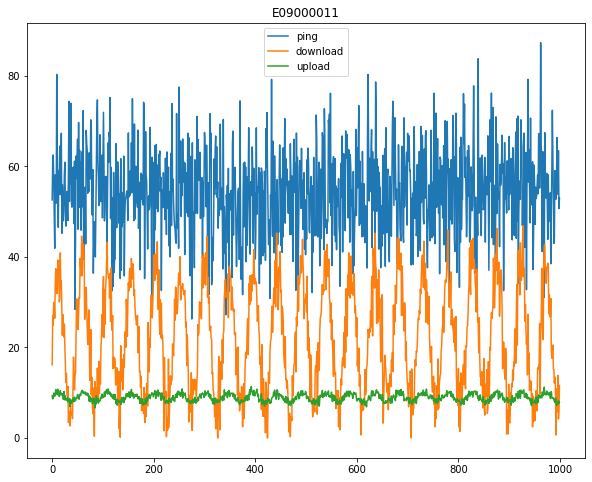

In [38]:
# Code Cell 17
area = columns[0]
plt.figure(figsize=(10, 8))

# Plot each variable in suffix.keys() for each area
for s in suffix.keys():
    query = 'SELECT {}{} FROM LA_wifi_speed_UK'.format(area,s)
    
    cur.execute(query)
    plt.plot(cur.fetchall(), label=suffix[s])
plt.legend()
plt.title(area)

In [37]:
area = columns[0]
area

'E09000011'